In [1]:
using TestImages
using Pkg
Pkg.activate("/Users/jiyong/development/Projects/nImageData.jl")
using nImageData, OpenCV
using BenchmarkTools

  Activating project at `~/development/Projects/nImageData.jl`


In [2]:
X0 = round.(UInt8, Float32.(testimage("cameraman"))*100)
X = zeros(UInt8, 532, 512)
X[1:512, 1:512]= X0[:,:]

512×512 Matrix{UInt8}:
 0x3d  0x3e  0x3f  0x3e  0x3e  0x3d  …  0x3b  0x3b  0x3b  0x3c  0x3c  0x3c
 0x3d  0x3e  0x3e  0x3e  0x3e  0x3d     0x3b  0x3b  0x3b  0x3c  0x3c  0x3c
 0x3e  0x3e  0x3d  0x3d  0x3e  0x3e     0x3c  0x3c  0x3c  0x3c  0x3c  0x3c
 0x3f  0x3e  0x3c  0x3c  0x3d  0x3e     0x3c  0x3c  0x3d  0x3c  0x3c  0x3c
 0x3e  0x3e  0x3d  0x3d  0x3e  0x3d     0x3c  0x3c  0x3c  0x3c  0x3c  0x3c
 0x3d  0x3e  0x3e  0x3e  0x3e  0x3d  …  0x3b  0x3b  0x3c  0x3c  0x3c  0x3c
 0x3e  0x3e  0x3d  0x3d  0x3e  0x3d     0x3c  0x3c  0x3c  0x3c  0x3c  0x3c
 0x3f  0x3e  0x3c  0x3c  0x3d  0x3e     0x3c  0x3c  0x3c  0x3c  0x3c  0x3c
 0x3e  0x3d  0x3c  0x3c  0x3d  0x3e     0x3c  0x3c  0x3c  0x3c  0x3c  0x3c
 0x3d  0x3c  0x3c  0x3c  0x3d  0x3e     0x3c  0x3c  0x3b  0x3b  0x3c  0x3c
    ⋮                             ⋮  ⋱                             ⋮  
 0x26  0x2a  0x2d  0x2d  0x2c  0x27     0x28  0x2d  0x31  0x2e  0x2a  0x29
 0x2c  0x2c  0x2c  0x2d  0x2e  0x2c     0x2e  0x30  0x31  0x2f  0x2d  0x2c
 0x31 

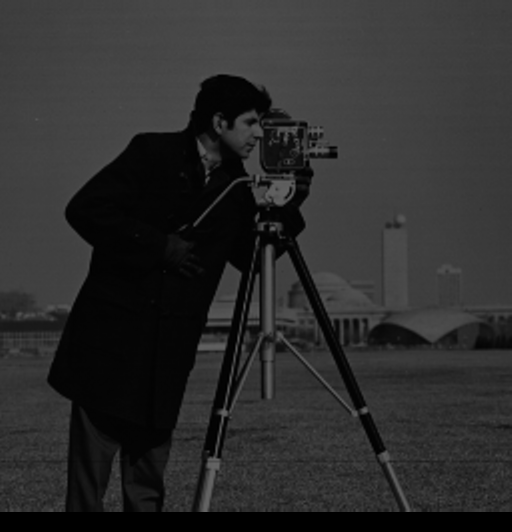

In [4]:
idt = ImageData(X)
mat2gray(idt, (0, 255))

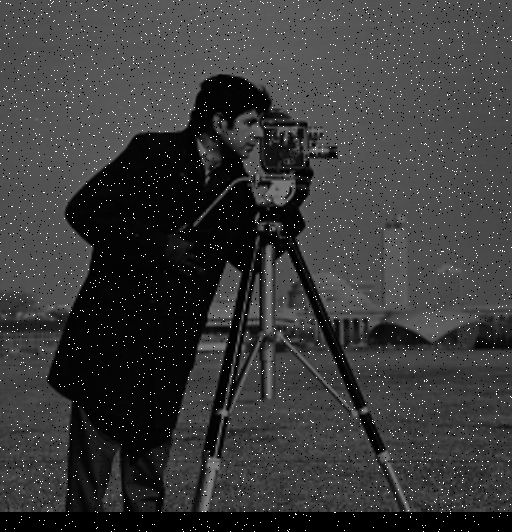

In [7]:
idt2=sand_pepper_noise(idt, 0.03)
mat2gray(idt2.mat, (1, 200))

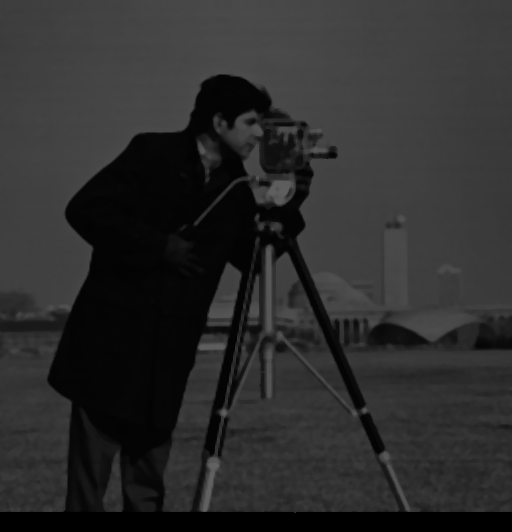

In [8]:
x2=OpenCV.medianBlur(Array2Mat(idt2.mat), 5)

In [6]:
size(x2)

(1, 512, 532)

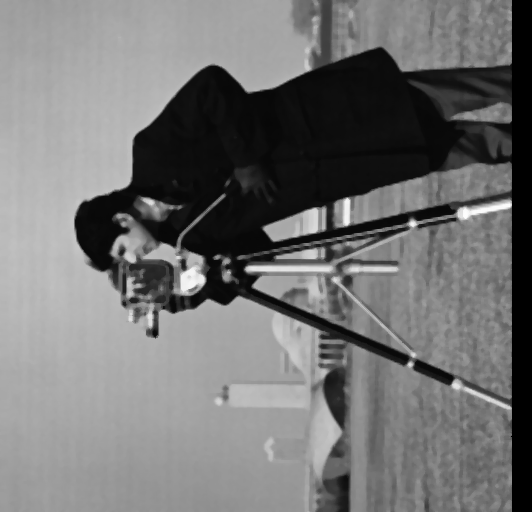

In [7]:
mat2gray(permutedims(x2, (2,3,1))[:,:,1])

In [8]:
x3=Mat2Array(x2)[:,:,1]

532×512 Matrix{UInt8}:
 0x9c  0x9d  0x9e  0x9d  0x9d  0x9c  …  0x97  0x97  0x98  0x98  0x98  0x98
 0x9d  0x9d  0x9d  0x9d  0x9d  0x9d     0x98  0x98  0x98  0x98  0x98  0x98
 0x9d  0x9d  0x9d  0x9d  0x9c  0x9c     0x99  0x98  0x98  0x98  0x98  0x98
 0x9d  0x9d  0x9d  0x9d  0x9c  0x9c     0x99  0x98  0x98  0x98  0x98  0x98
 0x9e  0x9d  0x9d  0x9d  0x9c  0x9c     0x99  0x99  0x99  0x99  0x99  0x98
 0x9e  0x9d  0x9d  0x9c  0x9c  0x9c  …  0x99  0x99  0x99  0x99  0x99  0x99
 0x9e  0x9d  0x9d  0x9c  0x9c  0x9c     0x99  0x99  0x99  0x99  0x99  0x99
 0x9d  0x9c  0x9c  0x9c  0x9c  0x9c     0x99  0x98  0x99  0x99  0x99  0x99
 0x9c  0x9b  0x9b  0x9b  0x9c  0x9c     0x98  0x98  0x98  0x98  0x98  0x98
 0x9b  0x9b  0x9a  0x9a  0x9b  0x9c     0x98  0x98  0x98  0x98  0x98  0x98
    ⋮                             ⋮  ⋱                             ⋮  
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00 

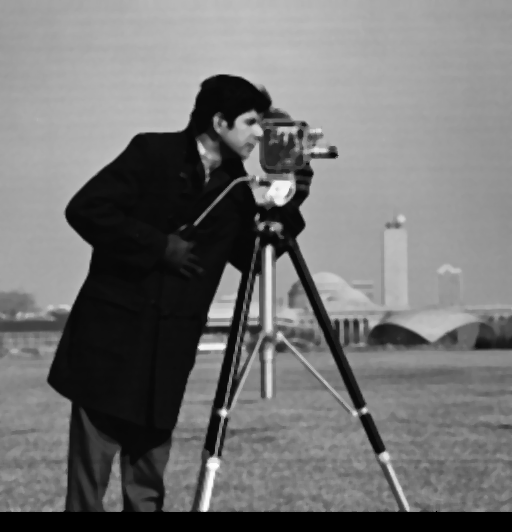

In [9]:
mat2gray(x3)

mat2gray(Y)

In [ ]:
flatten(A::Matrix{T}) where T<:Real = reshape(A, prod(size(A)))

flatten (generic function with 1 method)

In [17]:
@btime flatten(rand(3,3))

  118.559 ns (3 allocations: 208 bytes)


9-element Vector{Float64}:
 0.5023925665443958
 0.6229320927352214
 0.7278547581638242
 0.023668035806273635
 0.42091844547410695
 0.8290188864740013
 0.262688463520675
 0.5643518018508835
 0.7032262089493628